In [7]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [ ]:
class Triangle:
    def __init__(self, coordinate, color) -> None:
        self.coordinate = coordinate
        self.color = color

    def in_triangle(self, p):
        pa = self.coordinate[0]-p
        pb = self.coordinate[1]-p
        pc = self.coordinate[2]-p
        t1 = np.cross(pa, pb)
        t2 = np.cross(pb, pc)
        t3 = np.cross(pc, pa)
        return t1*t2 >= 0 and t1*t3 >= 0


In [8]:
point_num = 50
corner = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
points = np.random.random((point_num, 2))
points = np.concatenate((corner, points))
tri = Delaunay(points)


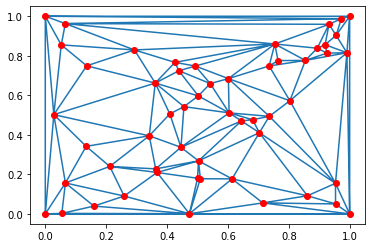

In [15]:
import matplotlib.pyplot as plt
# img=plt.imread("./data/Set14/baboon.png")
# fig,ax = plt.subplots()
# ax.imshow(img,extent=[0,1,0,1])
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o',c='red')
plt.show()

In [ ]:
for root, dirs, files in os.walk("../Set14/"):
    file='baboon.png'
    img = cv2.imread(os.path.join(root, file))
    img_points = np.array(points*[img.shape[0]-1, img.shape[1]-1], dtype=int)
    tri = Delaunay(img_points)
    points_coord = img_points[tri.simplices]
    tris = []
    for c in points_coord:
        color = np.array(
            [img[c[0][0]][c[0][1]], img[c[1][0]][c[1][1]], img[c[2][0]][c[2][1]]])
        color = np.mean(color, axis=0)
        tris.append(Triangle(c, color))

    computed = set()
    sample = np.zeros((img.shape[0], img.shape[1], 3))
    for t in tqdm(tris,leave=False):  # for each triangle
        bbox = np.array([[np.min(t.coordinate[:, 0]), np.min(t.coordinate[:, 1])],
                            [np.max(t.coordinate[:, 0]), np.max(t.coordinate[:, 1])]])
        for x in range(bbox[0][0], bbox[1][0]+1):
            for y in range(bbox[0][1], bbox[1][1]+1):
                if (x, y) in computed:
                    continue
                if t.in_triangle(np.array([x, y])):
                    computed.add((x, y))
                    sample[x][y] = t.color
    sample = np.array(sample, dtype=np.uint8)
    cv2.imwrite('../delaunay/{}/{}'.format(point_num,file), sample)

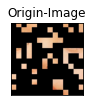

In [19]:
import cv2
image = plt.imread("../../CS337-Project/code_base/MAE-pytorch/output/FFT/mask_img.jpg")
plt.subplot(241), plt.imshow(image), plt.title(
        "Origin-Image"), plt.xticks([]), plt.yticks([])
plt.show()